# Electromiografía de la Enfermedad de Parkinson: 
## Análisis con filtros

## Flores Oliva Alejandro Elliot
###### Licenciatura en Física Biomédica en Ciencias Biológicas , Facultad de Ciencias, Universidad Nacional Autónoma de México.

## Índice:

######  Filtros 

[Filtro Butterworth.](#A)

+ [Filtro Butterworth (4er orden). ](#B)

[Filtro pasa bajas, filtro pasa altas y filtro pasa bandas.](#C)

* [Separamos por tipo de filtro.](#D)

[Filtro Notch (60Hz).](#E)

[filtfilt.](#F)

[lfilter.](#G)

[Filtro Mediano. ](#H)

[Filtro Wiener. ](#I)

[Filtro Savitzky-Golay. ](#J)

+ [Filtro Savitzky-Golay (2do orden). ](#K)

+ [Filtro Savitzky-Golay (4to orden). ](#L)

In [3]:
#Importamos las librerías necesarias para este notebook.
import scipy.io.wavfile         #El módulo de “wave”proporciona una interfaz conveniente para el formato de sonido WAV.
import numpy as np              #Es una biblioteca para crear vectores y matrices grandes multidimensionales.
import matplotlib.pyplot as plt #Nos provee de un framework de gráficos parecido a MATLAB.
from scipy.signal import butter, lfilter, filtfilt #Herramientas de procesamiento de señales, funciones de filtrado, algoritmos de interpolación.
from scipy.signal import savgol_filter
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import math            #Permite usar funciones matemáticas definidas en el estándar de C.
import scipy as sc     #Módulos para álgebra lineal, integración, interpolación, FFT, procesamiento de señales y de imagen, etc.
from scipy import signal 
import wave            #El módulo proporciona una interfaz para el formato de sonido WAV.

###### Abrimos nuetro registro que filtraremos 

Número de canales (estéreo o mono) : 2
Longitud de onda en segundos 181.4523
[0.000000e+00 1.000000e-04 2.000000e-04 ... 1.814520e+02 1.814521e+02
 1.814522e+02]


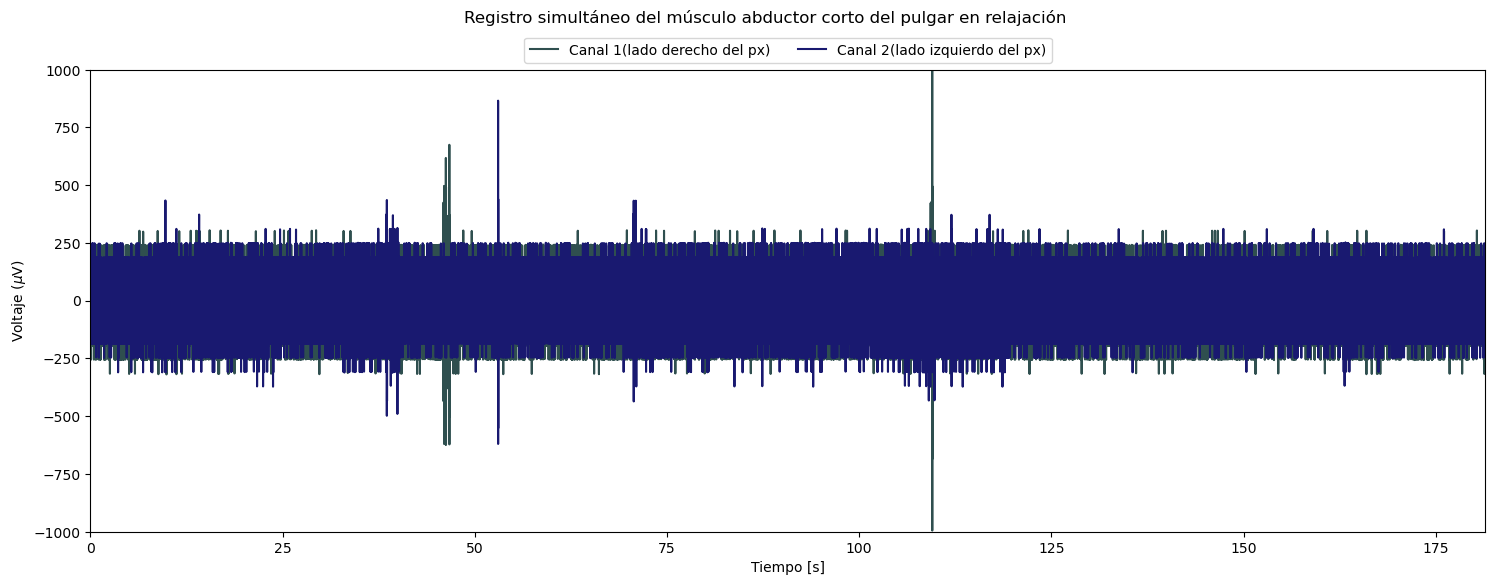

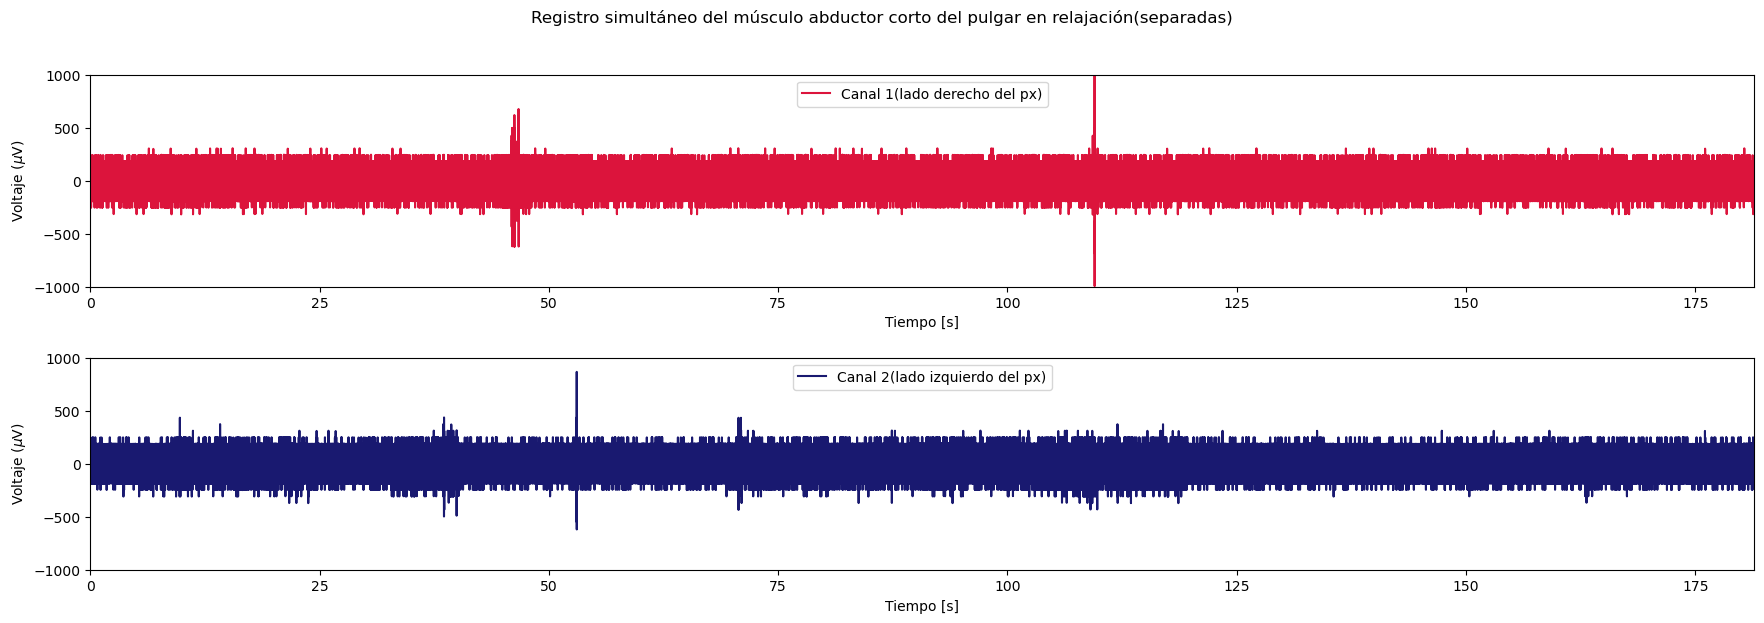

In [4]:
Folder="../Parkinson Notebooks/BYB/"    #Ubicar el folder donde se encuentra nuestro registro de EMG
rate,fileData=scipy.io.wavfile.read("../Parkinson Notebooks/BYB/29-01/Registro_AbdCorto_Relajación.wav") #Abrir nuestro archivo wav

#Imprimimos los datos que nos van a funcionar para graficar ambos canales.
print("Número de canales (estéreo o mono) : "+str(fileData.shape[1])) 
print("Longitud de onda en segundos "+str(fileData.shape[0] / rate))

#wav Número de canales 
channel1=fileData[:,0]                                  #Izquierda
channel2=fileData[:,1]                                  #Derecha
N = fileData.shape[0]                                   #Número de datos/puntos
EMGtiempo = np.arange(0, float(fileData.shape[0]), 1)/rate   #creamos una variable de tiempo en segundos 
print(EMGtiempo)

frec = 1/np.mean(np.diff(EMGtiempo))

#Graficamos EMG
plt.figure(figsize=(18,6))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación')

#Graficamos en conjunto

plt.plot(EMGtiempo,channel1, color='darkslategray',label="Canal 1(lado derecho del px)")
plt.plot(EMGtiempo,channel2, color='midnightblue',label="Canal 2(lado izquierdo del px)")
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje ($\mu$V)')
plt.ylim(-1000,1000)
plt.xlim(0,max(EMGtiempo))
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.show()

#Graficamos EMG
plt.figure(figsize=(18,6))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')

#Graficamos canal 1
plt.subplot(211)
plt.xlim(0,max(EMGtiempo))
plt.ylim(-1000,1000)
plt.plot(EMGtiempo, channel1, color='crimson',label="Canal 1(lado derecho del px)")
plt.legend(loc="upper center", bbox_to_anchor=[0.5, 1],ncol=2, fontsize="medium")
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje ($\mu$V)')

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

#Graficamos canal 2
plt.subplot(212)
plt.xlim(0,max(EMGtiempo))
plt.ylim(-1000,1000)
plt.plot(EMGtiempo, channel2, color='midnightblue',label="Canal 2(lado izquierdo del px)")
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje ($\mu$V)')
plt.legend(loc="upper center", bbox_to_anchor=[0.5, 1],ncol=2, fontsize="medium")
plt.show()


<a id='A'></a>
# Filtro Butterworth

EL filtro Butterworth pasa bajas proporciona una respuesta en frecuencia plana en la banda de paso, la ventaja de usar el filtro de Butterworth es que mantiene su forma para órdenes mayores. El filtro pasa bajo de primer orden, el cual se puede modificar a un filtro o transformarlo a un filtro pasa banda o elimina banda.

* [b,a] = butter(n,Wn) devuelve los coeficientes de la función de transferencia de un filtro digital Butterworth de paso bajo de orden n con frecuencia de corte normalizada Wn.

In [5]:
# Filtro Butterworth de paso banda a 10-400Hz.
b, a = butter(2, ([10, 400]/(frec/2)), btype = 'bandpass')
#[b, a] = butter (n, Wn, ftype) diseña un filtro Butterworth de paso bajo, paso alto, paso banda o supresión de banda.
#La señal depende del valor de ftype y el número de elementos de Wn.

filtButter1 = filtfilt(b, a, channel1) #Canal 1(derecha)
filtButter2 = filtfilt(b, a, channel2) #Canal 2(izquierda)

Text(0, 0.5, 'Voltaje ($\\mu$V)')

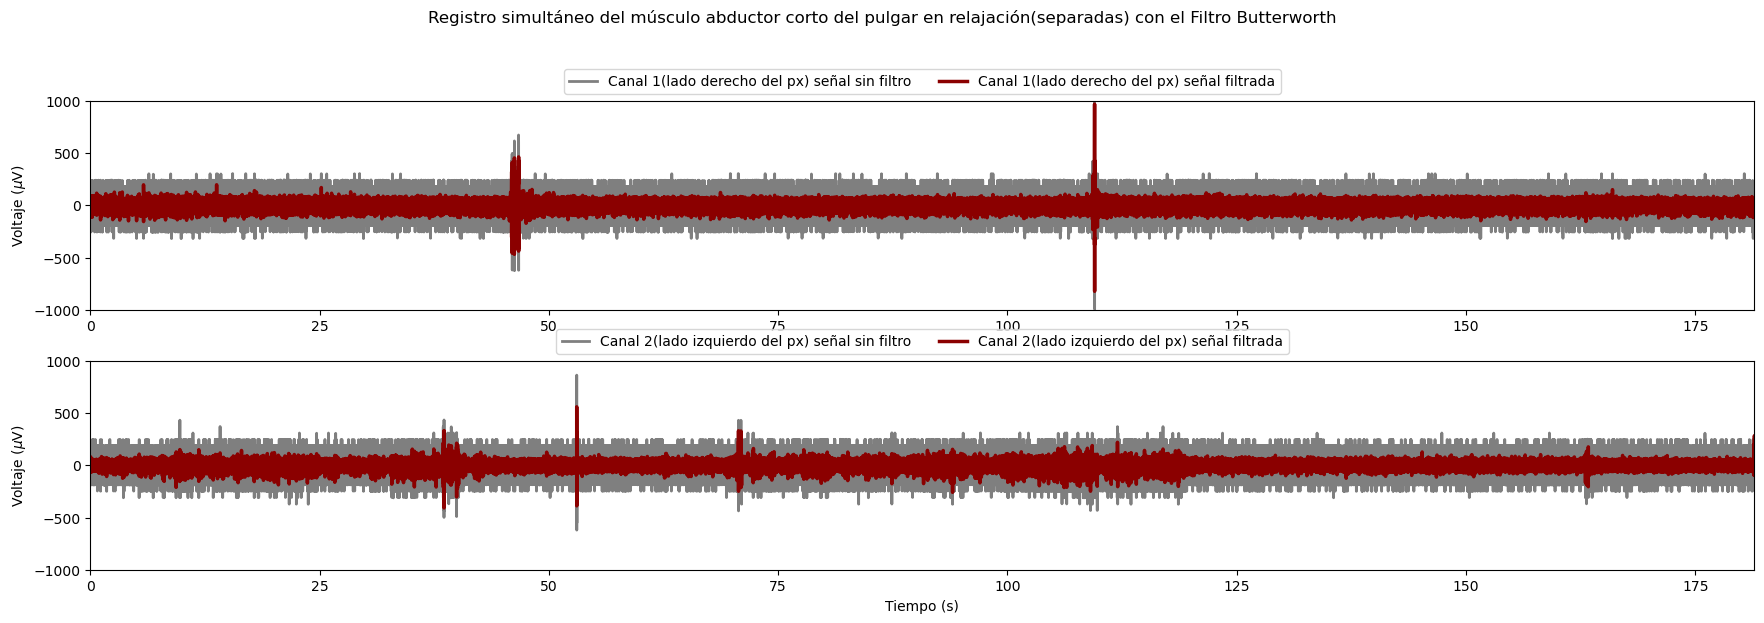

In [6]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Butterworth') #Título principal

plt.subplot(211)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filtButter1, 'darkred', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada")                  #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
#plt.xlabel('Tiempo (s)')                                                 #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filtButter2, 'darkred', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada")                  #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

### Ampliamos ventana de visualización

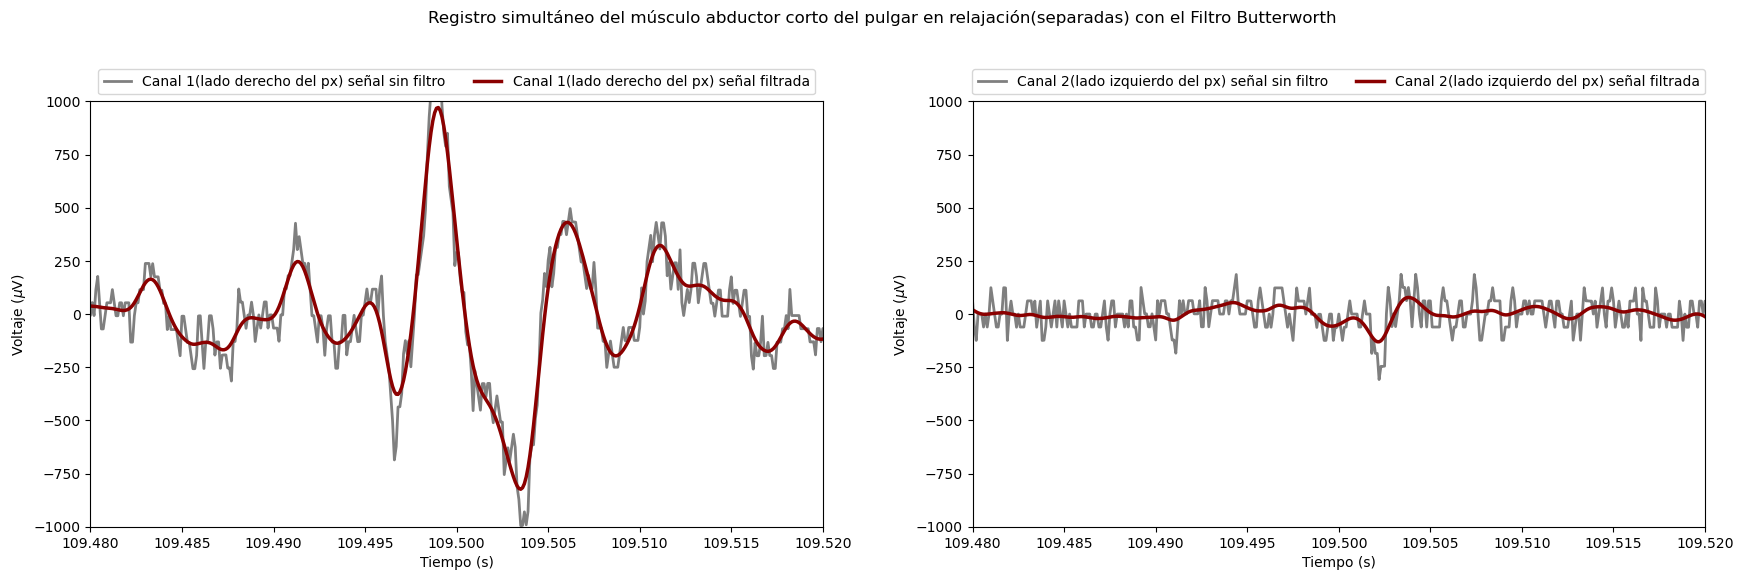

In [7]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Butterworth') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")  #Trazo de la señal con color.
plt.plot(EMGtiempo,filtButter1, 'darkred', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada")         #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo,filtButter2, 'darkred', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada")        #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.


# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

<a id='B'></a>
# Filtro Butterworth (4er orden)

In [8]:
# Filtro Butterworth de paso banda a 10-400Hz.
b, a = butter(4, ([10, 400]/(frec/2)), btype = 'bandpass')
#[b, a] = butter (n, Wn, ftype) diseña un filtro Butterworth de paso bajo, paso alto, paso banda o supresión de banda.
#La señal depende del valor de ftype y el número de elementos de Wn.

filtButter1 = filtfilt(b, a, channel1) #Canal 1(derecha)
filtButter2 = filtfilt(b, a, channel2) #Canal 2(izquierda)

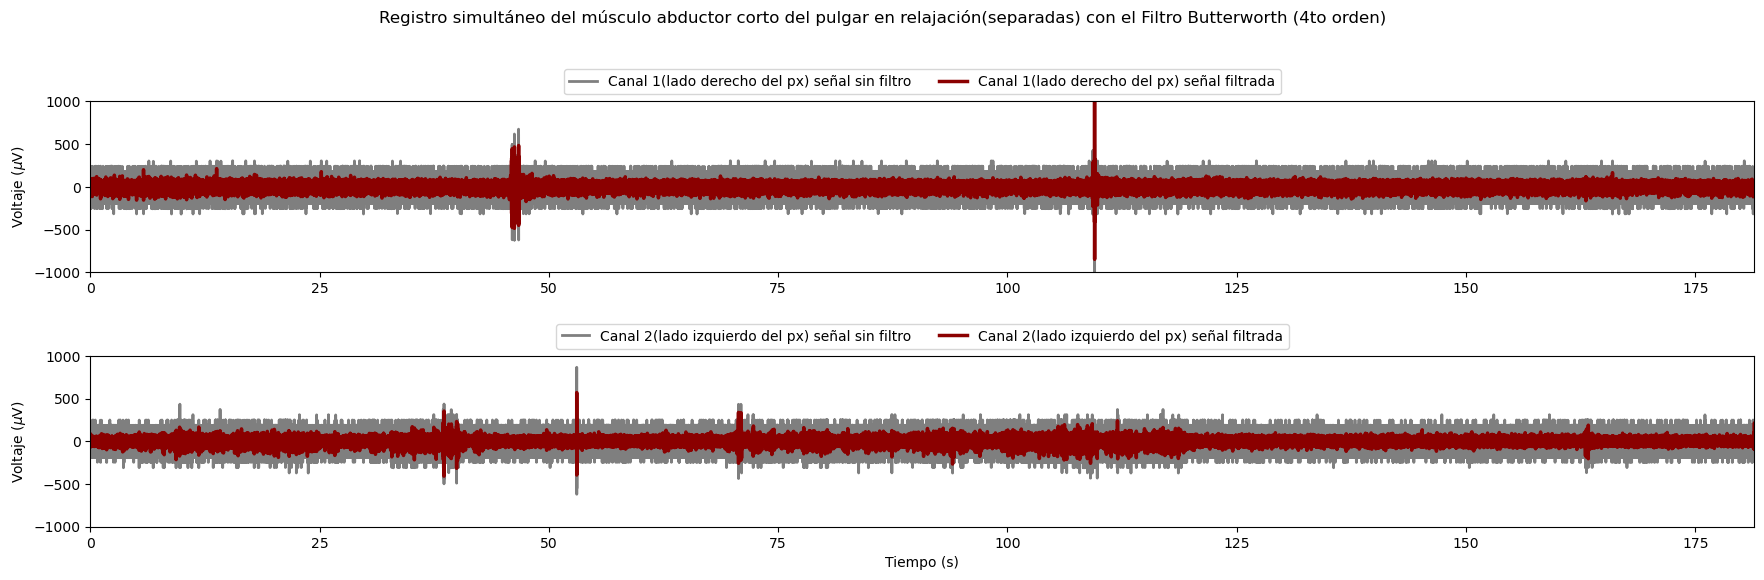

In [9]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Butterworth (4to orden)') #Título principal

plt.subplot(211)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filtButter1, 'darkred', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada")                  #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
#plt.xlabel('Tiempo (s)')                                                 #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filtButter2, 'darkred', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada")                  #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.


# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

### Ampliamos ventana de visualización

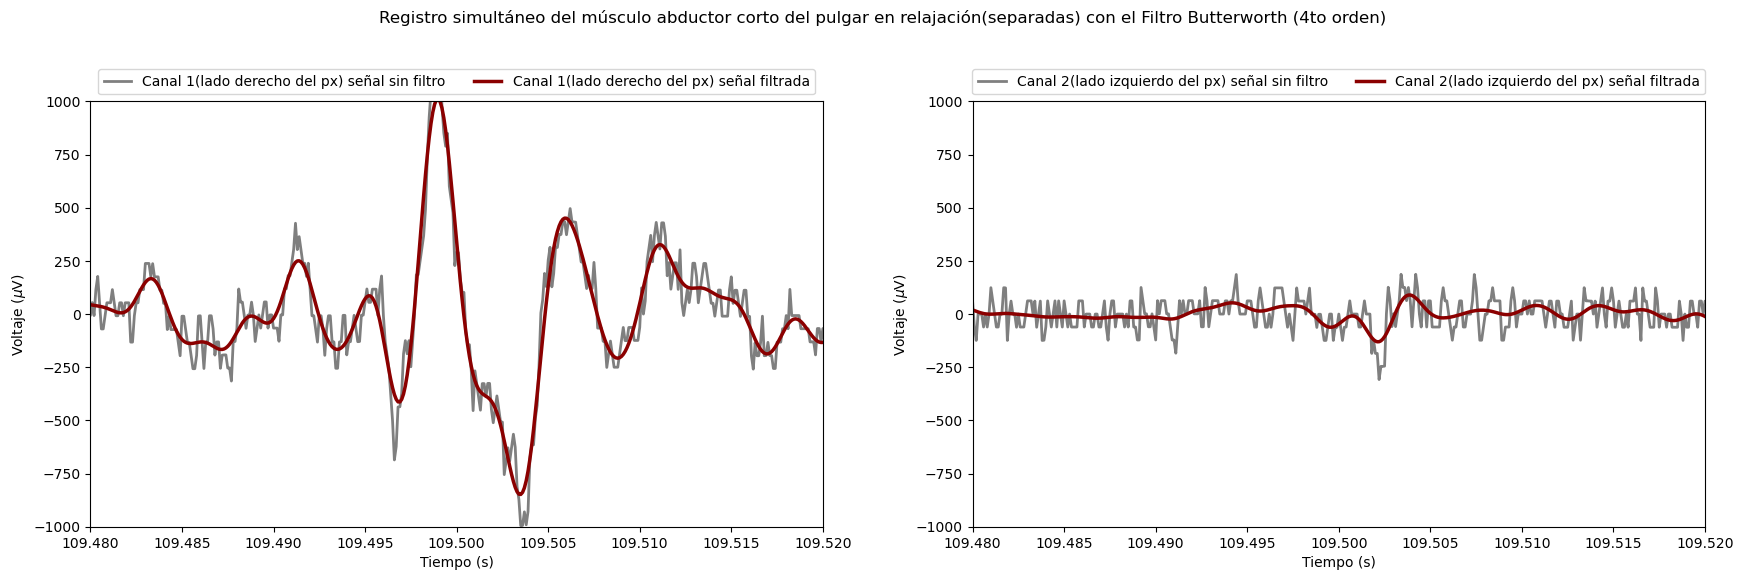

In [10]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Butterworth (4to orden)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")  #Trazo de la señal con color.
plt.plot(EMGtiempo,filtButter1, 'darkred', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada")    #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo,filtButter2, 'darkred', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada")   #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.


# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

<a id='C'></a>
# Filtro pasa bajas, filtro pasa altas y filtro pasa bandas. 

#### Pasa bajas: 
Son filtros que únicamente dejan pasar la señal que esta por debajo de una determinada frecuencia.
#### Pasa altas: 
Este filtro permite reducir la amplitud de frecuencias que estén por debajo de la frecuencia de corte.
#### Pasa badas: 
El filtro deja pasar la frecuencia de resonancia, en este filtro existen dos frecuencias de corte, una inferior y otra superior. Este filtro solo atenúa las señales cuya frecuencia sea menor a la frecuencia de corte inferior o aquella frecuencias mayores a la frecuencia superior.

* (n,Wn,ftype) diseña un filtro Butterworth de paso bajo, paso alto, paso banda o eliminador de banda, dependiendo del valor de ftype y del número de elementos de Wn. Los diseños de paso banda y de eliminador de banda resultantes son de orden 2n.

In [11]:
#Filtro pasa banda.
b, a = scipy.signal.butter(3, 0.05, 'lowpass')
filteredLowPass1 = scipy.signal.filtfilt(b, a, channel1) #Canal 1(derecha) con filtro pasa bajas
filteredLowPass2= scipy.signal.filtfilt(b, a, channel2)  #Canal 2(Izquierda) con filtro pasa bajas

#Filtro pasa altas.
b, a = scipy.signal.butter(3, 0.05, 'highpass')
filteredHighPass1 = scipy.signal.filtfilt(b, a, channel1) #Canal 1(derecha) con filtro pasa altas
filteredHighPass2 = scipy.signal.filtfilt(b, a, channel2) #Canal 2(Izquierda) con filtro pasa altas

#Filtro pasa banda.
b, a = scipy.signal.butter(3, [.01, .05], 'band')
filteredBandPass1 = scipy.signal.lfilter(b, a, channel1) #Canal 1(derecha) con filtro pasa bandas
filteredBandPass2 = scipy.signal.lfilter(b, a, channel2) #Canal 2(Izquierda) con filtro pasa bandas

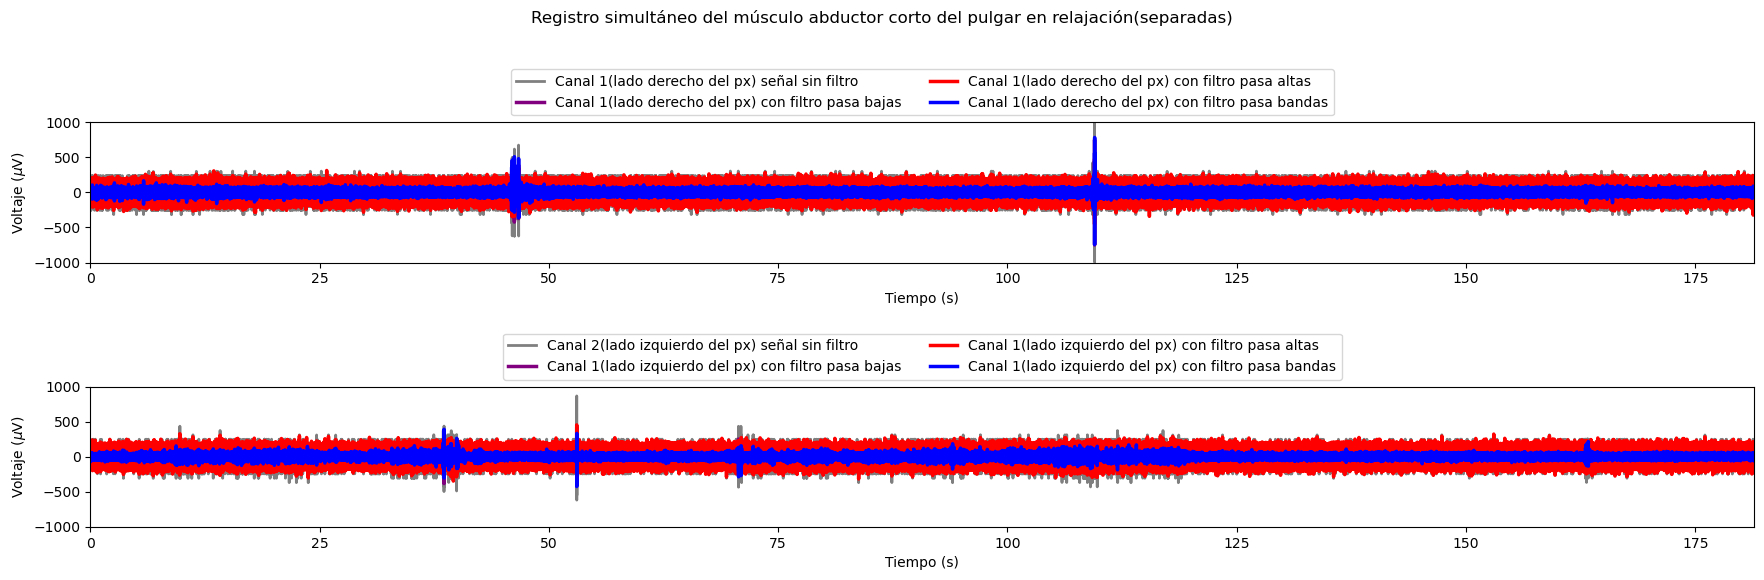

In [12]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(211)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredLowPass1, 'purple', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa bajas") #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredHighPass1, 'red', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa altas")   #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredBandPass1, 'blue', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa bandas") #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                 #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredLowPass2, 'purple', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa bajas") #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredHighPass2, 'red', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa altas")   #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredBandPass2, 'blue', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa bandas") #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.


# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

### Ampliamos ventana de visualización

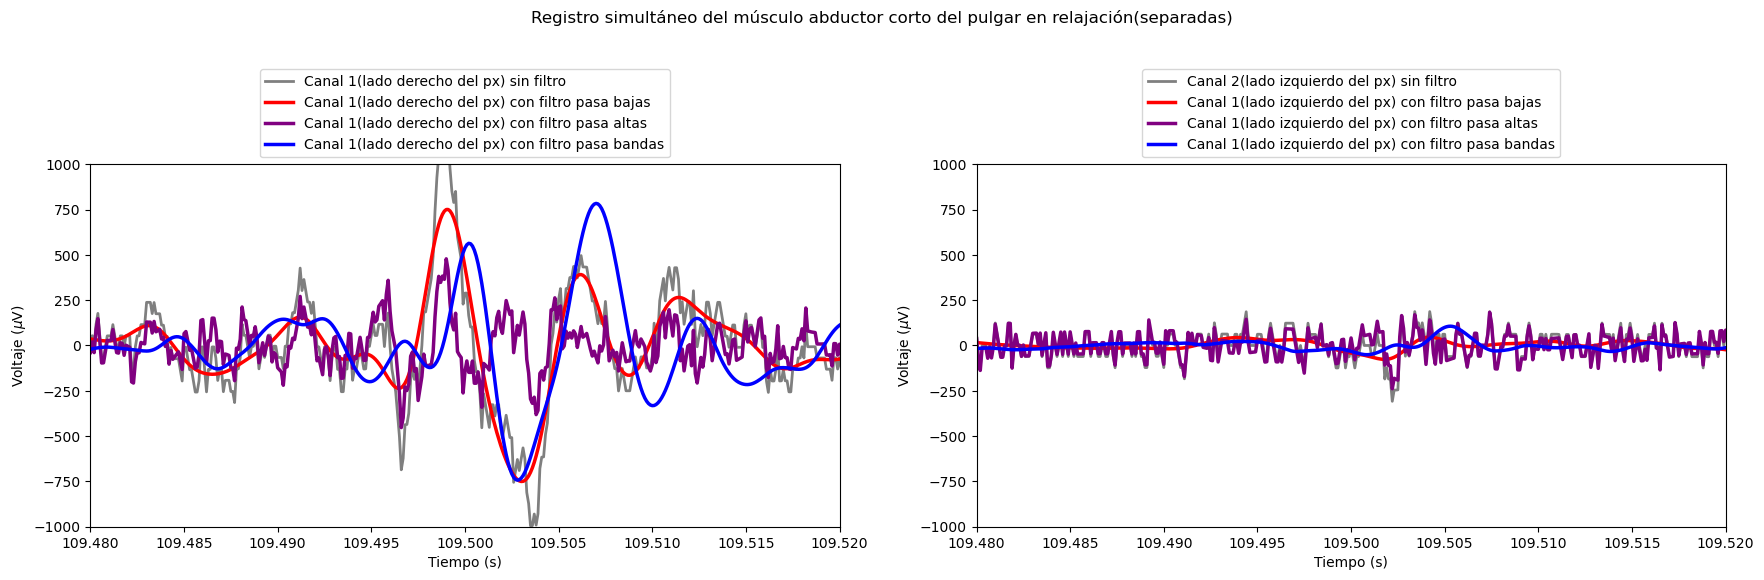

In [25]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo,channel1, 'black', alpha=0.5,linewidth=2.0,label="Canal 1(lado derecho del px) sin filtro")                     #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredLowPass1, 'red', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa bajas")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredHighPass1, 'purple',linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa altas") #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredBandPass1, 'blue', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa bandas") #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(122)
plt.plot(EMGtiempo,channel2, 'black', alpha=0.5,linewidth=2.0,label="Canal 2(lado izquierdo del px) sin filtro")                    #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredLowPass2, 'red', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa bajas")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filteredHighPass2, 'purple', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa altas")#Trazo de la señal con color.
plt.plot(EMGtiempo,filteredBandPass2, 'blue', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa bandas") #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

<a id='D'></a>
### Separamos por tipo de filtro

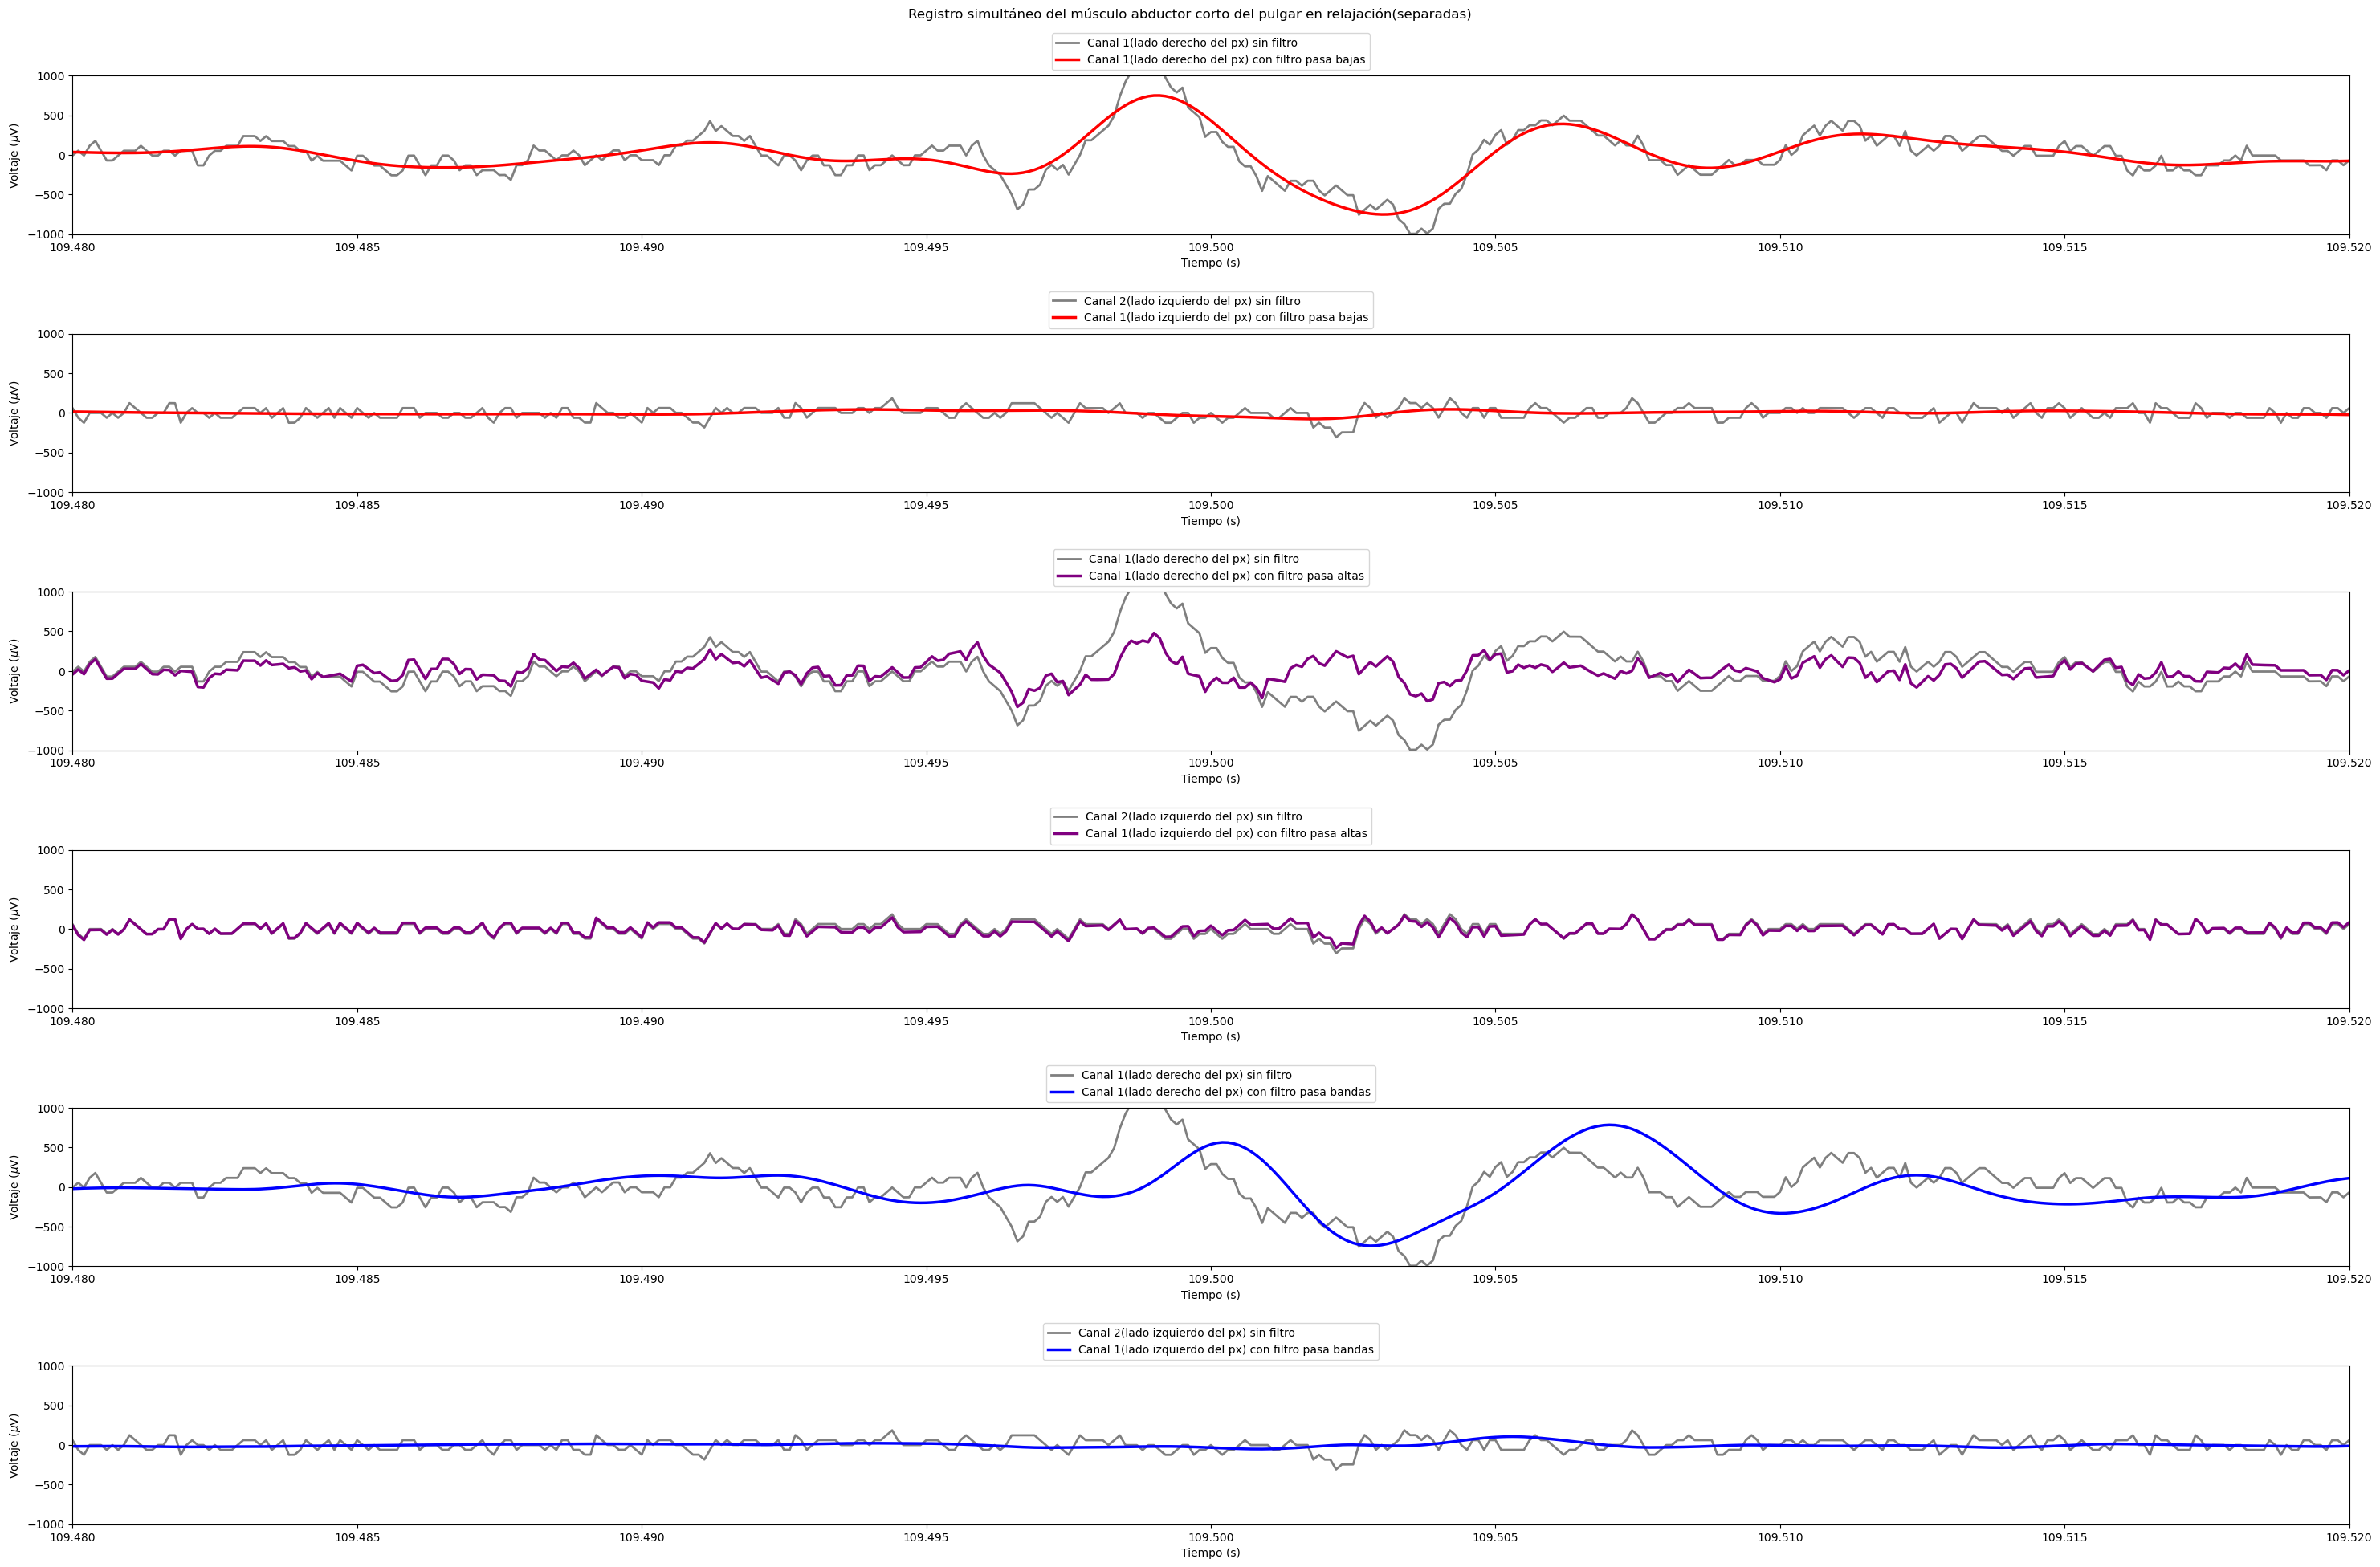

In [26]:
fig, [ax1, ax2, ax3, ax4, ax5, ax6] = plt.subplots(nrows=6, ncols=1, sharex= False, sharey= True, figsize = (30,20))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

#Graficamos EMG
ax1.plot(EMGtiempo,channel1, 'black', alpha=0.5,linewidth=2.0,label="Canal 1(lado derecho del px) sin filtro")        #Trazo de la señal con color.
ax1.plot(EMGtiempo,filteredLowPass1, 'red', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa bajas") #Trazo de la señal con color.
ax1.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax1.set_xlim(109.480,109.520)                                                 #Eje x
ax1.set_ylim(-1000,1000);                                                     #Eje y
ax1.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax1.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax2.plot(EMGtiempo,channel2, 'black', alpha=0.5,linewidth=2.0,label="Canal 2(lado izquierdo del px) sin filtro")        #Trazo de la señal con color.
ax2.plot(EMGtiempo,filteredLowPass2, 'red', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa bajas") #Trazo de la señal con color.
ax2.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax2.set_xlim(109.480,109.520)                                                 #Eje x
ax2.set_ylim(-1000,1000);                                                     #Eje y
ax2.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax2.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax3.plot(EMGtiempo,channel1, 'black', alpha=0.5,linewidth=2.0,label="Canal 1(lado derecho del px) sin filtro")           #Trazo de la señal con color.
ax3.plot(EMGtiempo,filteredHighPass1, 'purple',linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa altas") #Trazo de la señal con color.
ax3.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax3.set_xlim(109.480,109.520)                                                 #Eje x
ax3.set_ylim(-1000,1000);                                                     #Eje y
ax3.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax3.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax4.plot(EMGtiempo,channel2, 'black', alpha=0.5,linewidth=2.0,label="Canal 2(lado izquierdo del px) sin filtro")           #Trazo de la señal con color.
ax4.plot(EMGtiempo,filteredHighPass2, 'purple', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa altas")#Trazo de la señal con color.
ax4.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax4.set_xlim(109.480,109.520)                                                 #Eje x
ax4.set_ylim(-1000,1000);                                                     #Eje y
ax4.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax4.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax5.plot(EMGtiempo,channel1, 'black', alpha=0.5,linewidth=2.0,label="Canal 1(lado derecho del px) sin filtro")           #Trazo de la señal con color.
ax5.plot(EMGtiempo,filteredBandPass1, 'blue', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro pasa bandas") #Trazo de la señal con color.
ax5.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax5.set_xlim(109.480,109.520)                                                 #Eje x
ax5.set_ylim(-1000,1000);                                                     #Eje y
ax5.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax5.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax6.plot(EMGtiempo,channel2, 'black', alpha=0.5,linewidth=2.0,label="Canal 2(lado izquierdo del px) sin filtro")           #Trazo de la señal con color.
ax6.plot(EMGtiempo,filteredBandPass2, 'blue', linewidth=2.5,label="Canal 1(lado izquierdo del px) con filtro pasa bandas") #Trazo de la señal con color.
ax6.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax6.set_xlim(109.480,109.520)                                                 #Eje x
ax6.set_ylim(-1000,1000);                                                     #Eje y
ax6.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax6.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

<a id='E'></a>
# Filtro Notch (60Hz)

Este filtro rechaza el ruido a 60 Hz, este tipo de filtro se encarga de rechazar una frecuencia derterminada en este emitiendo ruido. 

In [ ]:
fs = 1/np.mean(np.diff(EMGtiempo))  # Frecuencia de muestreo (Hz)
f0 = 60.0                           # Frecuencia removida (Hz)
Q = 50.0                            # Factor de calidad
# Implementando el filtro Notch
b_notch, a_notch = signal.iirnotch(f0, Q, fs)

filtnotch1 = lfilter(b_notch, a_notch, channel1)  # Canal 1 (derecho) con filtro Notch
filtnotch2 = lfilter(b_notch, a_notch, channel2)  # Canal 2 (izquierdo) con filtro Notch

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Notch (frecuencia removida 60Hz)') #Título principal

plt.subplot(211)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0,label="Canal 1(lado derecho del px) señal sin filtro")              #Trazo de la señal con color.
plt.plot(EMGtiempo,filtnotch1, 'darkorange', linewidth=2.5,label="Canal 1(lado derecho del px) señal con filtro Notch") #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, label="Canal 2(lado izquierdo del px) señal sin filtro")             #Trazo de la señal con color.
plt.plot(EMGtiempo,filtnotch2, 'darkorange', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal con filtro Notch") #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

### Ampliamos ventana de visualización

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas) con el Filtro Notch (frecuencia removida 60Hz)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0,alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")    #Trazo de la señal con color.
plt.plot(EMGtiempo,filtnotch1, 'darkorange', linewidth=2.5,label="Canal 1(lado derecho del px) señal con filtro Notch") #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-500,500);                                                       #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5, label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo,filtnotch2, 'darkorange', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal con filtro Notch")#Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], ncol=2, fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                       #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

<a id='F'></a>
# filtfilt 
Es un filtrado de fase cero, que no cambia la señal a medida que se filtra. Dado que la fase es cero en todas las frecuencias, también es de fase lineal. Filtrar hacia atrás en el tiempo solo se puede usar para el procesamiento  se señales fuera de línea.
<a id='G'></a>
# lfilter 
Es solo filtrado causal hacia adelante en el tiempo, similar a un filtro electrónico de la vida real. No puede ser de fase cero. Por lo general, agrega diferentes cantidades de retraso en diferentes frecuencias.

In [ ]:
# Filtro Butterworth de paso banda a 10-400Hz.
b, a = butter(2, ([10, 400]/(frec/2)), btype = 'bandpass')
#[b, a] = butter (n, Wn, ftype) diseña un filtro Butterworth de paso bajo, paso alto, paso banda o supresión de banda.

filtFilt1 = filtfilt(b, a, channel1) #Canal 1 (derecho) con filtro filtfilt
filtFilt2 = filtfilt(b, a, channel2) #Canal 2 (izquierdo) con filtro lfilter
filtIfilt1 = lfilter(b, a, channel1) #Canal 1 (derecho) con filtro filtfilt
filtIfilt2 = lfilter(b, a, channel2) #Canal 2 (izquierdo) con filtro lfilter

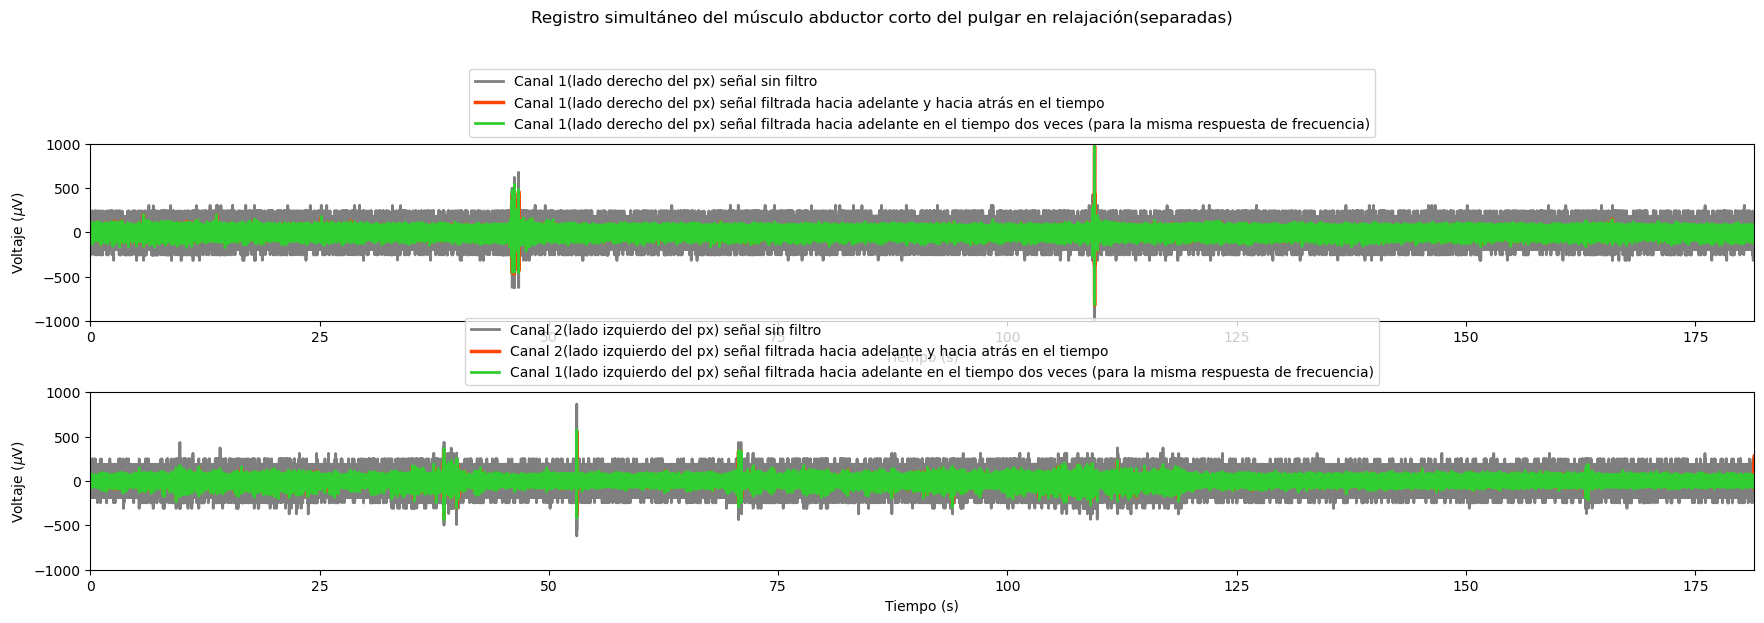

In [19]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(211)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")                                                       #Trazo de la señal con color.
plt.plot(EMGtiempo,filtFilt1, 'orangered', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada hacia adelante y hacia atrás en el tiempo ")                                   #Trazo de la señal con color.
plt.plot(EMGtiempo,filtIfilt1, 'limegreen', linewidth=2.0,label="Canal 1(lado derecho del px) señal filtrada hacia adelante en el tiempo dos veces (para la misma respuesta de frecuencia)")#Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")                                                       #Trazo de la señal con color.
plt.plot(EMGtiempo,filtFilt2, 'orangered', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada hacia adelante y hacia atrás en el tiempo")                                    #Trazo de la señal con color.
plt.plot(EMGtiempo,filtIfilt2, 'limegreen', linewidth=2.0,label="Canal 1(lado izquierdo del px) señal filtrada hacia adelante en el tiempo dos veces (para la misma respuesta de frecuencia)")#Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

### Graficamos por separado

In [ ]:
#Graficamos EMG
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=4, ncols=1, sharex= False, sharey= True, figsize = (30,20))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

ax1.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")                                                       #Trazo de la señal con color.
ax1.plot(EMGtiempo,filtFilt1, 'orangered', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada hacia adelante y hacia atrás en el tiempo ")                                   #Trazo de la señal con color.
ax1.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax1.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax1.set_ylim(-1000,1000);                                                     #Eje y
ax1.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax1.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax2.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")                                                       #Trazo de la señal con color.
ax2.plot(EMGtiempo,filtIfilt1, 'limegreen', linewidth=2.0,label="Canal 1(lado derecho del px) señal filtrada hacia adelante en el tiempo dos veces (para la misma respuesta de frecuencia)")#Trazo de la señal con color.
ax2.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax2.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax2.set_ylim(-1000,1000);                                                     #Eje y
ax2.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax2.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax3.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")                                                       #Trazo de la señal con color.
ax3.plot(EMGtiempo,filtFilt2, 'orangered', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada hacia adelante y hacia atrás en el tiempo")                                    #Trazo de la señal con color.
ax3.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax3.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax3.set_ylim(-1000,1000);                                                     #Eje y
ax3.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax3.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax4.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")                                                       #Trazo de la señal con color.
ax4.plot(EMGtiempo,filtIfilt2, 'limegreen', linewidth=2.0,label="Canal 1(lado izquierdo del px) señal filtrada hacia adelante en el tiempo dos veces (para la misma respuesta de frecuencia)")#Trazo de la señal con color.
ax4.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax4.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax4.set_ylim(-1000,1000);                                                     #Eje y
ax4.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax4.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

### Ampliamos ventana de visualización

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo,channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro")                     #Trazo de la señal con color.
plt.plot(EMGtiempo,filtFilt1, 'orangered', linewidth=2.5,label="Canal 1(lado derecho del px) señal filtrada hacia adelante y hacia atrás en el tiempo ") #Trazo de la señal con color.
plt.plot(EMGtiempo,filtIfilt1, 'limegreen', linewidth=2.0,label="Canal 1(lado derecho del px) señal filtrada hacia adelante en el tiempo dos veces")      #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo,channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro")                    #Trazo de la señal con color.
plt.plot(EMGtiempo,filtFilt2, 'orangered', linewidth=2.5,label="Canal 2(lado izquierdo del px) señal filtrada hacia adelante y hacia atrás en el tiempo ")#Trazo de la señal con color.
plt.plot(EMGtiempo,filtIfilt2, 'limegreen', linewidth=2.0,label="Canal 1(lado izquierdo del px) señal filtrada hacia adelante en el tiempo dos veces")     #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

# Filtro Mediano y Filtro Wiener

Usamos dos filtros de paso bajo no lineales.
<a id='H'></a>
### Filtro mediano
El filtro mediano es una técnica de filtrado digital no lineal, a menudo utilizada para eliminar el ruido. El filtro tiene dos entradas, la señal de entrada y un tamaño de ventana (tamaño del kernel, la cual variamos).
<a id='I'></a>
### Filtro Wiener
El filtrado de Wiener se puede utilizar para tareas de separación y eliminación de ruido o interferencia de la fuente de audio. 

In [ ]:
filtmed1 = signal.medfilt(channel1, kernel_size=5) #Canal 1 (derecho) con filtro mediano
filtwi1 = signal.wiener(channel1, mysize=55)       #Canal 2 (izquierdo) con filtro Wiener
filtmed2 = signal.medfilt(channel2, kernel_size=5) #Canal 1 (derecho) con filtro mediano
filtwi2 = signal.wiener(channel2,mysize=55)        #Canal 2 (izquierdo)con filtro Wiener

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(211)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtmed1, 'tomato', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro mediano ")        #Trazo de la señal con color.
plt.plot(EMGtiempo, filtwi1 , 'blueviolet', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Wiener")      #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtmed2, 'tomato', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro mediano")         #Trazo de la señal con color.
plt.plot(EMGtiempo, filtwi2, 'blueviolet', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Wiener")       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

MemoryError: Unable to allocate 13.8 MiB for an array with shape (1814523,) and data type float64

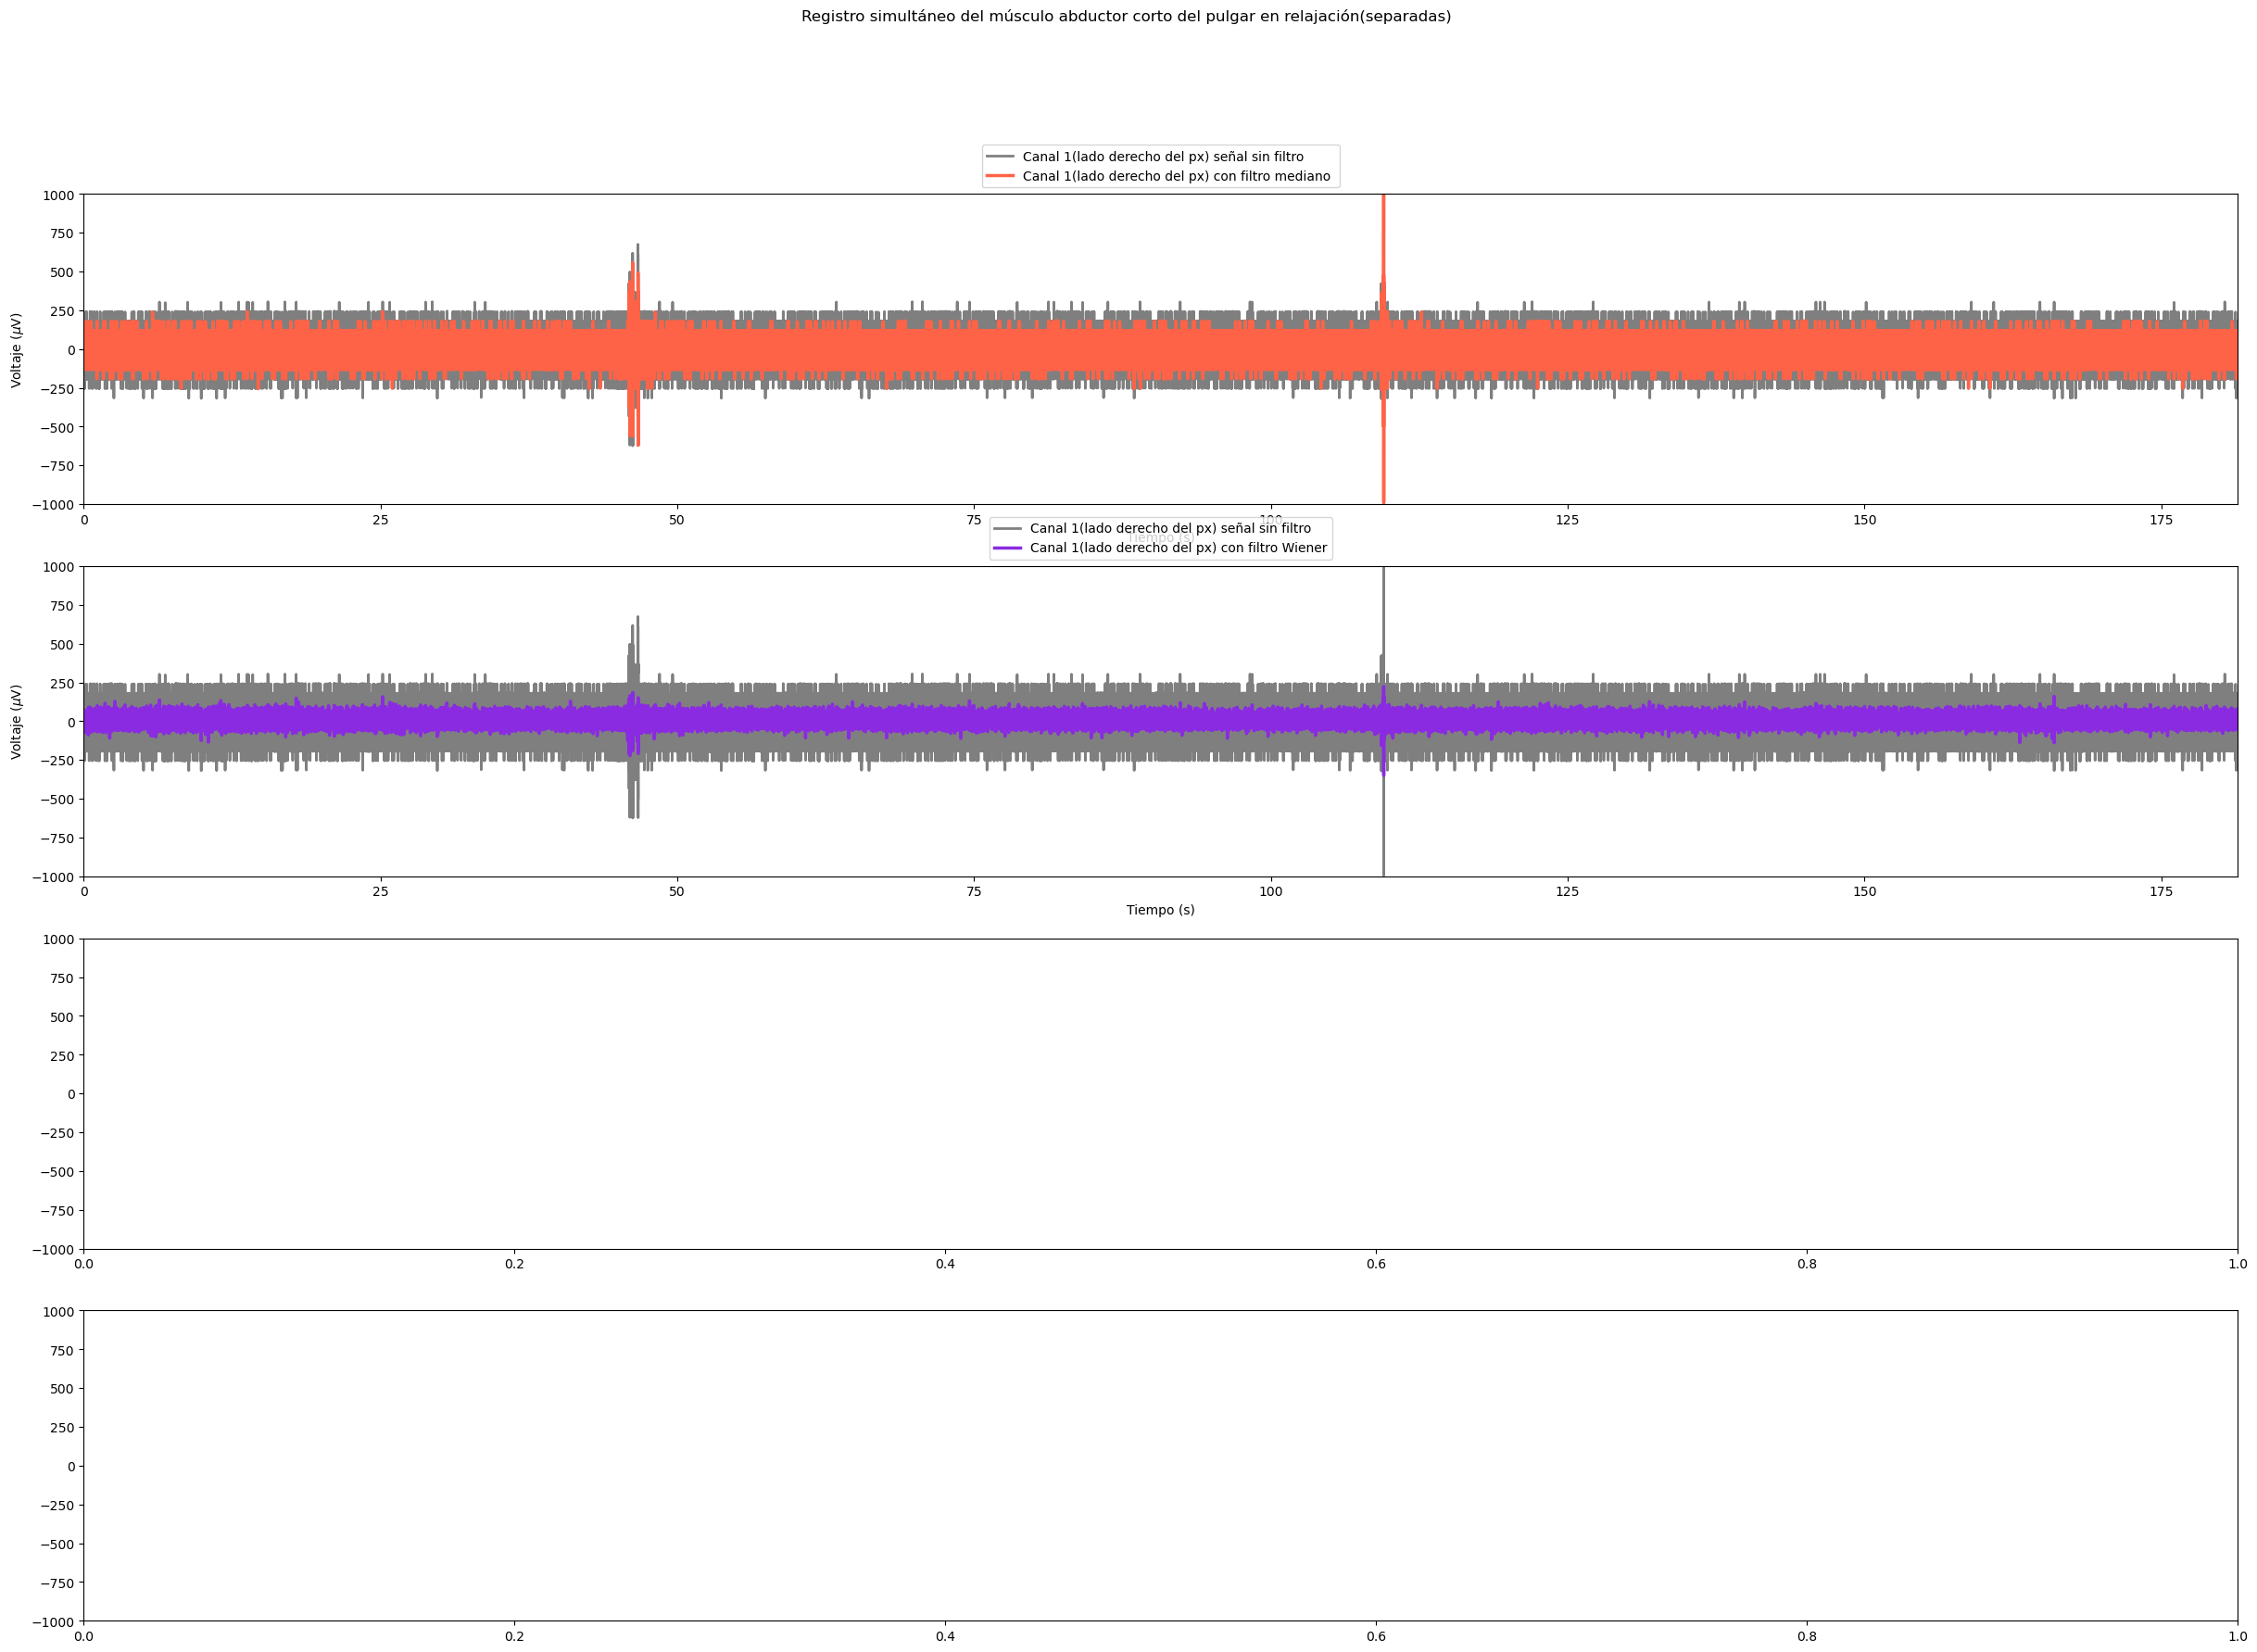

In [24]:
#Graficamos EMG
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=4, ncols=1, sharex= False, sharey= True, figsize = (30,20))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

ax1.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
ax1.plot(EMGtiempo, filtmed1, 'tomato', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro mediano ")        #Trazo de la señal con color.
ax1.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax1.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax1.set_ylim(-1000,1000);                                                     #Eje y
ax1.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax1.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax2.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
ax2.plot(EMGtiempo, filtwi1 , 'blueviolet', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Wiener")      #Trazo de la señal con color.
ax2.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax2.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax2.set_ylim(-1000,1000);                                                     #Eje y
ax2.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax2.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax3.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
ax3.plot(EMGtiempo, filtmed2, 'tomato', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro mediano")         #Trazo de la señal con color.
ax3.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax3.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax3.set_ylim(-1000,1000);                                                     #Eje y
ax3.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax3.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax4.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
ax4.plot(EMGtiempo, filtwi2, 'blueviolet', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Wiener")       #Trazo de la señal con color.
ax4.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax4.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax4.set_ylim(-1000,1000);                                                     #Eje y
ax4.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax4.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtmed1, 'tomato', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro mediano ")        #Trazo de la señal con color.
plt.plot(EMGtiempo, filtwi1 , 'blueviolet', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Wiener")      #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtmed2, 'tomato', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro mediano")         #Trazo de la señal con color.
plt.plot(EMGtiempo, filtwi2, 'blueviolet', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Wiener")       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

### Cambiar el Kernel y el tamaño

In [ ]:
filtmed1 = signal.medfilt(channel1, kernel_size=21) #Canal 1 (derecho) con filtro mediano
filtwi1 = signal.wiener(channel1, mysize=25)        #Canal 2 (izquierdo) con filtro Wiener
filtmed2 = signal.medfilt(channel2, kernel_size=21) #Canal 1 (derecho) con filtro mediano
filtwi2 = signal.wiener(channel2,mysize=25)         #Canal 2 (izquierdo)con filtro Wiener

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')  #Título principal

plt.subplot(211)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtmed1, 'tomato', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro mediano ")        #Trazo de la señal con color.
plt.plot(EMGtiempo, filtwi1 , 'blueviolet', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Wiener")      #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtmed2, 'tomato', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro mediano")         #Trazo de la señal con color.
plt.plot(EMGtiempo, filtwi2, 'blueviolet', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Wiener")       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

In [ ]:
#Graficamos EMG
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=4, ncols=1, sharex= False, sharey= True, figsize = (30,20))
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

ax1.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
ax1.plot(EMGtiempo, filtmed1, 'tomato', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro mediano ")        #Trazo de la señal con color.
ax1.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax1.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax1.set_ylim(-1000,1000);                                                     #Eje y
ax1.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax1.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax2.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
ax2.plot(EMGtiempo, filtwi1 , 'blueviolet', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Wiener")      #Trazo de la señal con color.
ax2.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax2.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax2.set_ylim(-1000,1000);                                                     #Eje y
ax2.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax2.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax3.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
ax3.plot(EMGtiempo, filtmed2, 'tomato', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro mediano")         #Trazo de la señal con color.
ax3.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax3.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax3.set_ylim(-1000,1000);                                                     #Eje y
ax3.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax3.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

ax4.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
ax4.plot(EMGtiempo, filtwi2, 'blueviolet', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Wiener")       #Trazo de la señal con color.
ax4.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
ax4.set_xlim(0,max(EMGtiempo))                                                #Eje x
ax4.set_ylim(-1000,1000);                                                     #Eje y
ax4.set_xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
ax4.set_ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtmed1, 'tomato', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro mediano ")        #Trazo de la señal con color.
plt.plot(EMGtiempo, filtwi1 , 'blueviolet', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Wiener")      #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtmed2, 'tomato', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro mediano")         #Trazo de la señal con color.
plt.plot(EMGtiempo, filtwi2, 'blueviolet', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Wiener")       #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

<a id='J'></a>
# Filtro Savitzky Golay

Es un filtro digital permite suavizar los datos, no distorsionan la tendencia de la señal. Este filtrado utiliza la convolución, mediante subconjuntos de puntos de datos adyacentes con un polinomio de diferentes grados, a través del método de mínimos cuadrados lineales, se puede encontrar una solución analítica para las ecuaciones de mínimos cuadrados cuando los puntos estan en un espacio cercano, en este filtro se pueden dar estimaciones de la suavizada señal o derivados de la señal suavizada mediante los subconjuntos.

* scipy.signal.savgol_coeffs(signal,window_length, polyorder) %se usa para diseñar el filtro%
* signal: registro que obstuvimos del emg.
* window_length: La longitud de la ventana de filtro (es decir, el número de coeficientes).Window_length (int, opcional, predeterminado = 5): la dimensión de la ventana de suavizado; debe ser un entero impar.
      
* polyorder: El orden del polinomio utilizado para ajustar los samples, polyorder debe ser menor que window_length.

In [ ]:
#Diseñamos el filtro
filtsavgol1 = scipy.signal.savgol_filter(channel1, 15, 0) # window size 15, polynomial order 0, canal 1 (derecha)
filtsavgol2 = scipy.signal.savgol_filter(channel2, 15, 0) # window size 15, polynomial order 0, canal 2(izquierda)

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')  #Título principal

plt.subplot(211)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol1, 'chocolate', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Savitzky Golay ")        #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol2, 'chocolate', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Savitzky Golay")         #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol1 , 'chocolate', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Savitzky Golay ")        #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol2 , 'chocolate', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Savitzky Golay")         #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

<a id='K'></a>
## Filtro Savitzky Golay (2do orden)

In [ ]:
filtsavgol1 = scipy.signal.savgol_filter(channel1, 15, 2) # window size 15, polynomial order 2, canal 1 (derecha)
filtsavgol2 = scipy.signal.savgol_filter(channel2, 15, 2) # window size 15, polynomial order 2, canal 2(izquierda)

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')  #Título principal

plt.subplot(211)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol1, 'chocolate', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Savitzky Golay ")        #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol2, 'chocolate', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Savitzky Golay")         #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol1 , 'chocolate', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Savitzky Golay ")        #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol2 , 'chocolate', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Savitzky Golay")         #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

<a id='L'></a>
## Filtro Savitzky Golay (4to orden)

In [ ]:
filtsavgol1 = scipy.signal.savgol_filter(channel1, 15, 4) # window size 15, polynomial order 4, canal 1 (derecha)
filtsavgol2 = scipy.signal.savgol_filter(channel2, 15, 4) # window size 15, polynomial order 4, canal 2(izquierda)

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)')  #Título principal

plt.subplot(211)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol1, 'chocolate', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Savitzky Golay ")        #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

plt.subplot(212)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol2, 'chocolate', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Savitzky Golay")         #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(0,max(EMGtiempo))                                                #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

In [ ]:
#Graficamos EMG
plt.figure(figsize=(18,6))                                                #Tamaño de la figura dibujada con Matplotlib
plt.suptitle('Registro simultáneo del músculo abductor corto del pulgar en relajación(separadas)') #Título principal

plt.subplot(121)
plt.plot(EMGtiempo, channel1, 'black', linewidth=2.0, alpha=0.5,label="Canal 1(lado derecho del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol1 , 'chocolate', linewidth=2.5,label="Canal 1(lado derecho del px) con filtro Savitzky Golay ")        #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

plt.subplot(122)
plt.plot(EMGtiempo, channel2, 'black', linewidth=2.0, alpha=0.5,label="Canal 2(lado izquierdo del px) señal sin filtro") #Trazo de la señal con color.
plt.plot(EMGtiempo, filtsavgol2 , 'chocolate', linewidth=2.5,label="Canal 2(lado izquierdo del px) con filtro Savitzky Golay")         #Trazo de la señal con color.
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1], fontsize="medium")
plt.xlim(109.480,109.520)                                                 #Eje x
plt.ylim(-1000,1000);                                                     #Eje y
plt.xlabel('Tiempo (s)')                                                  #Título del eje horizontal.
plt.ylabel('Voltaje ($\mu$V)')                                            #Título del eje vertical.

# Espaciado entre ventanas
plt.tight_layout(pad=2.0)

Registros y Notebook elaborado por Alejandro Elliot Flores Oliva, licenciatura en Física Biomédica, Facultad de Ciencias, Universidad Autónoma de México (UNAM), correo: elliotflooli@ciencias.unam.mx